In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
#import everythin for a sequential keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout

In [2]:
#load dataset
train_features_data=pd.read_csv('train_features.csv')
labels_data=pd.read_csv('train_labels.csv')
#extract features with pandas groupby method
train_data=pd.DataFrame(train_features_data.groupby(['pid']).mean())
train=train_data.reset_index().drop(columns=['pid', 'Time']).fillna(train_data.mean())
labels=labels_data.drop(columns=['pid'])
labels = labels[['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct', 'LABEL_EtCO2']]
#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=42)

In [60]:
train_features_data=pd.read_csv('train_features.csv')
labels_data=pd.read_csv('train_labels.csv')
labels_data=labels_data.drop(columns=['pid'])

In [ ]:
train_features_data=pd.read_csv('train_features.csv')
labels_data=pd.read_csv('train_labels.csv')
labels_copied = pd.DataFrame()
for i in range(len(labels_data)):
    for j in range(12):
        labels_copied = labels_copied.append(labels_data.loc[i,:])
train_features_data_new = pd.concat([train_features_data, labels_copied])

train = train_features_data_new.reset_index().drop(columns=['pid', 'Time']).fillna(method='ffill')

In [57]:
labels = train[['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct', 'LABEL_EtCO2']]
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=42)

4

In [ ]:
#make a sequential model
model = Sequential([
    Dense(units=128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='sigmoid'),
])
#compile the model

model.summary()


In [ ]:

model.compile(optimizer='sgd', loss='binary_focal_crossentropy', metrics=[tf.keras.metrics.AUC()])
model.fit(X_train, y_train, epochs=40, batch_size=32)

In [39]:
display(y_train[y_train == 1].sum()/y_train.shape[0]*100)
display(y_train.shape)


LABEL_BaseExcess          26.671492
LABEL_Fibrinogen           7.297973
LABEL_AST                 23.933930
LABEL_Alkalinephos        23.631219
LABEL_Bilirubin_total     24.058963
LABEL_Lactate             19.840748
LABEL_TroponinI           10.107923
LABEL_SaO2                23.256120
LABEL_Bilirubin_direct     3.382469
LABEL_EtCO2                6.528034
dtype: float64

(15196, 10)

Predict Separately

In [2]:
#load dataset
train_features_data=pd.read_csv('train_features.csv')
labels_data=pd.read_csv('train_labels.csv')
#extract features with pandas groupby method
train_data=pd.DataFrame(train_features_data.groupby(['pid']).mean())
train=train_data.reset_index().drop(columns=['pid', 'Time']).fillna(train_data.mean())
labels=labels_data.drop(columns=['pid'])
labels = labels[['LABEL_Bilirubin_total']]
#split into train and test set

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=42)
#SVC versuch
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid',probability=True, class_weight='balanced')
svc.fit(X_train, np.ravel(y_train))
y_pred = svc.predict(X_test)


## Subtask 2

In [2]:
train_features_data=pd.read_csv('train_features.csv')
labels_data=pd.read_csv('train_labels.csv')
# add labels with matching pid to features
labels_copied = pd.DataFrame()
labels_copied = labels_data.loc[labels_data.index.repeat(12)]
labels_copied = labels_copied.drop(columns=['pid'])

In [3]:
#join labels on the right of the features
train_features_data_new = train_features_data.join(labels_copied, how='right')
train_features_data_new = train_features_data_new.drop(columns=['pid', 'Time']).reset_index(drop=True)

In [4]:
X = train_features_data.drop(columns=['pid', 'Time']).reset_index(drop=True).fillna(train_features_data.mean())
y = labels_copied['LABEL_Sepsis']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

Epoch 1/400
90/90 [==============================] - 1s 7ms/step - loss: 0.8727 - auc_5: 0.5042
Epoch 2/400
90/90 [==============================] - 1s 6ms/step - loss: 0.2346 - auc_5: 0.5421
Epoch 3/400
90/90 [==============================] - 1s 6ms/step - loss: 0.2355 - auc_5: 0.5435
Epoch 4/400
90/90 [==============================] - 1s 6ms/step - loss: 0.9251 - auc_5: 0.5032
Epoch 5/400
90/90 [==============================] - 1s 6ms/step - loss: 0.2315 - auc_5: 0.5335
Epoch 6/400
90/90 [==============================] - 1s 7ms/step - loss: 0.2241 - auc_5: 0.5652
Epoch 7/400
90/90 [==============================] - 1s 6ms/step - loss: 0.2296 - auc_5: 0.5446
Epoch 8/400
90/90 [==============================] - 1s 6ms/step - loss: 0.2285 - auc_5: 0.5589
Epoch 9/400
90/90 [==============================] - 1s 7ms/step - loss: 0.2229 - auc_5: 0.5694
Epoch 10/400
90/90 [==============================] - 1s 6ms/step - loss: 0.2232 - auc_5: 0.5645
Epoch 11/400
90/90 [===================

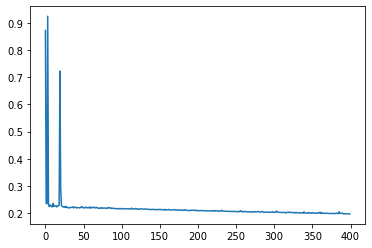

In [20]:
model = Sequential([
    Dense(units=128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(units=128, activation='relu'),
    #Dropout(0.2),
    Dense(units=1, activation='sigmoid'),
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

history = model.fit(X_train, np.ravel(y_train), epochs=400, batch_size=2048)

plt.plot(history.history['loss'])
plt.show()

y_pred = model.predict(X_test)

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

plot_metrics(history)

### New try with SVM/SVC/SGDClassifier

In [59]:
#SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l2', class_weight='balanced', warm_start=True)
sgd.fit(X_train, np.ravel(y_train))
y_pred = sgd.predict_proba(X_test)

0.6086126575395427


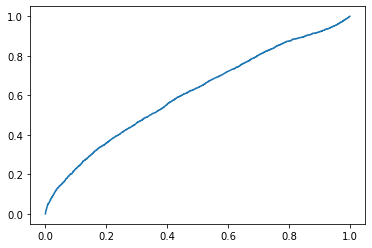

In [21]:
#calculate the AUC ROC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
print(roc_auc_score(y_test, y_pred)) 